In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

import scipy as sp
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [5]:
p_data = sp.sparse.load_npz('/home/taylor/Documents/independent-research/data/20x20x20/pDisc_40000.npz')
C_data = sp.sparse.load_npz('/home/taylor/Documents/independent-research/data/20x20x20/CDisc_40000.npz')
p_labels = np.zeros((p_data.shape[0],))
C_labels = np.ones((C_data.shape[0],))

In [6]:
full_data = sp.sparse.vstack([p_data, C_data], format='csr')
full_labels = np.hstack((p_labels, C_labels))
print(full_data.shape)
print(full_labels.shape)

(80002, 8000)
(80002,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(full_data, full_labels, test_size=0.25, random_state=0)

In [8]:
reg = 1
iterations = 1000
lr = LogisticRegression(C=reg, max_iter=iterations)
y_pred = lr.fit(X_train, y_train).predict(X_test)

In [9]:
print("With regularization C=" + str(reg) + " precision: " + str(metrics.precision_score(y_test, y_pred)))
print("With regularization C=" + str(reg) + " accuracy: " + str(metrics.accuracy_score(y_test, y_pred)))
print(metrics.classification_report(y_test, y_pred))

With regularization C=1 precision: 0.666056891978
With regularization C=1 accuracy: 0.676866156692
             precision    recall  f1-score   support

        0.0       0.69      0.63      0.66      9907
        1.0       0.67      0.72      0.69     10094

avg / total       0.68      0.68      0.68     20001



In [10]:
C_vals = [10e-6, 10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3]
print(C_vals)

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]


In [11]:
precisions = []
recalls = []
f1s = []

for c in C_vals:
    y_pred = LogisticRegression(C=c, max_iter=iterations).fit(X_train, y_train).predict(X_test)
    precisions.append(metrics.precision_score(y_test, y_pred))
    recalls.append(metrics.recall_score(y_test, y_pred))
    f1s.append(metrics.f1_score(y_test, y_pred))

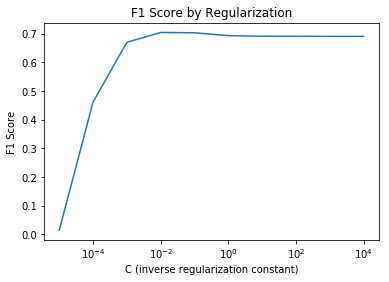

In [17]:
a = np.arange(len(C_vals))

plt.plot(C_vals, f1s)
plt.xscale('log')
        
plt.xlabel('C (inverse regularization constant)')
plt.ylabel('F1 Score')
plt.title('F1 Score by Regularization')

plt.savefig('/home/taylor/Documents/independent-research/plots/LogisticRegression_F1xC.pdf')

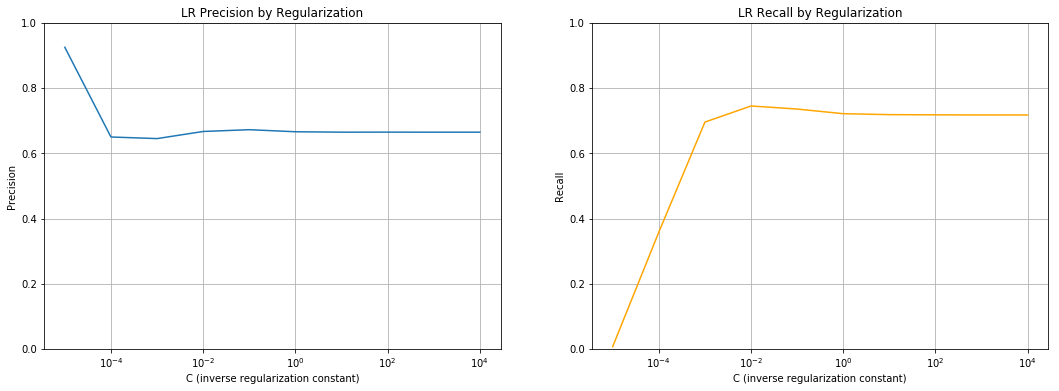

In [13]:
fig, ax = plt.subplots(1, 2, squeeze=True, figsize=(18, 6))

ax[0].plot(C_vals, precisions)
ax[0].semilogx()     
ax[0].set_ylim(0,1)
ax[0].set_xlabel('C (inverse regularization constant)')
ax[0].set_ylabel('Precision')
ax[0].set_title('LR Precision by Regularization')
ax[0].grid()

#######################################################################################################################
ax[1].plot(C_vals, recalls, c='orange')
ax[1].semilogx()
ax[1].set_ylim(0,1)
ax[1].set_xlabel('C (inverse regularization constant)')
ax[1].set_ylabel('Recall')
ax[1].set_title('LR Recall by Regularization')
ax[1].grid()

#fig.savefig('/home/taylor/Documents/independent-research/plots/LogisticRegression_C_PR.pdf')

In [14]:
param_grid = {'C': [10e-6, 10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3]}
scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    clf = GridSearchCV(LogisticRegression(), param_grid)
    clf.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print('')

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 0.1}

Grid scores on development set:

0.502 (+/-0.001) for {'C': 1e-05}
0.561 (+/-0.003) for {'C': 0.0001}
0.645 (+/-0.007) for {'C': 0.001}
0.678 (+/-0.004) for {'C': 0.01}
0.681 (+/-0.004) for {'C': 0.1}
0.672 (+/-0.006) for {'C': 1.0}
0.668 (+/-0.008) for {'C': 10.0}
0.667 (+/-0.008) for {'C': 100.0}
0.667 (+/-0.008) for {'C': 1000.0}
0.667 (+/-0.008) for {'C': 10000.0}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

        0.0       0.70      0.63      0.67      9907
        1.0       0.67      0.74      0.70     10094

avg / total       0.69      0.69      0.68     20001


# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 0.1}

Grid scores on development set:

0.502 (+/-0.001) for {'C': 1e-05}
0.561 (+/-0.